In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, precision_recall_curve

import tensorflow as tf
from tensorflow.keras.utils import plot_model

import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, InputLayer, Flatten, Conv2D, MaxPooling2D, BatchNormalization

np.random.seed(42)
tf.random.set_seed(42)

In [2]:
from preprocessing.getdata import *
df = get_csvdata()
dfTrain, dfTest, y_train, y_test = train_test_split(df, df['CDR'], stratify = df['CDR'], random_state=42)
N=10
X_train = get_slices(dfTrain['ID'], N=N, d=2, dim=2, m=90)
y_train = y_train.repeat(1+2*N)
X_test = get_slices(dfTest['ID'], dim=2, m=90)

In [3]:
HEIGHT = X_train.shape[1]
WIDTH = X_train.shape[2]

In [4]:
model = Sequential()

# layers
model.add(InputLayer(input_shape=[HEIGHT, WIDTH, 1], name='image'))
model.add(Conv2D(8, 3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(l=0.01)))
model.add(Conv2D(8, 3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(l=0.01)))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Conv2D(16, 3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(l=0.01)))
model.add(Conv2D(16, 3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(l=0.01)))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(units=64, activation="relu", kernel_regularizer=keras.regularizers.l2(l=0.05)))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam')
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy']) #[keras.metrics.Precision(), keras.metrics.Recall()])
print(model.summary())

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-08-22 14:32:29.636942: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-22 14:32:29.637973: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 208, 8)       80        
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 208, 8)       584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 104, 8)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 88, 104, 8)       32        
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 88, 104, 16)       1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 88, 104, 16)       2

In [5]:
training = model.fit(X_train, y_train, batch_size = 32, validation_split=0.0, epochs = 20, validation_data=(X_test, y_test))
        #callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1.0*10**(-epoch/30))])

Epoch 1/20


2022-08-22 14:32:30.997977: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-22 14:32:31.541352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


90/90 [==============================] - 9s 87ms/step - loss: 1.8256 - accuracy: 0.5445 - val_loss: 0.9655 - val_accuracy: 0.5870
Epoch 2/20


2022-08-22 14:32:39.694370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


90/90 [==============================] - 7s 81ms/step - loss: 0.9512 - accuracy: 0.6138 - val_loss: 0.9284 - val_accuracy: 0.6304
Epoch 3/20
90/90 [==============================] - 7s 80ms/step - loss: 0.9287 - accuracy: 0.6744 - val_loss: 1.0031 - val_accuracy: 0.5652
Epoch 4/20
90/90 [==============================] - 7s 78ms/step - loss: 0.8767 - accuracy: 0.7132 - val_loss: 0.9718 - val_accuracy: 0.5435
Epoch 5/20
90/90 [==============================] - 7s 77ms/step - loss: 0.8298 - accuracy: 0.7437 - val_loss: 0.9405 - val_accuracy: 0.6739
Epoch 6/20
90/90 [==============================] - 7s 77ms/step - loss: 0.7719 - accuracy: 0.7745 - val_loss: 0.9989 - val_accuracy: 0.5870
Epoch 7/20
90/90 [==============================] - 7s 80ms/step - loss: 0.7387 - accuracy: 0.8001 - val_loss: 1.4357 - val_accuracy: 0.5870
Epoch 8/20
90/90 [==============================] - 7s 79ms/step - loss: 0.7113 - accuracy: 0.8239 - val_loss: 1.0014 - val_accuracy: 0.6522
Epoch 9/20
90/90 [======

In [6]:
X_test = get_slices(dfTest['ID'], dim=2, m=90, N=5, d=1)
y_predd = model.predict(X_test)
y_pred = (y_predd>0.5).astype(int)

2022-08-22 14:35:00.197796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [7]:
l = []
for i in range(46):
    for j in np.where(y_pred.reshape((46,11))[i]==y_test.values[i])[0]:
        l.append(j)

In [8]:
for i in range(12):
    print(i, l.count(i))

0 30
1 31
2 24
3 29
4 26
5 33
6 30
7 33
8 30
9 32
10 29
11 0


In [9]:
from scipy import stats
y_pred1 = np.array(stats.mode(y_pred.reshape((46,11)), axis=1, keepdims=False))[0]

Text(91.68, 0.5, 'predicted label')

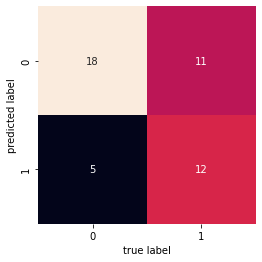

In [10]:
accuracy_score(y_test, y_pred1)
mat = confusion_matrix(y_test, y_pred1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

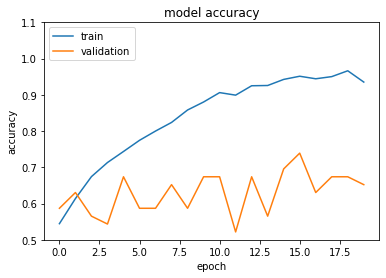

In [11]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim([0.5,1.1])
plt.show()

In [12]:
y_predd = model.predict(X_test)
y_pred = (y_predd>0.5).astype(int)

# Plotting the confusing matrix
mat = confusion_matrix(y_test, y_pred.round())
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print('accuracy: ' , accuracy_score(y_test, y_pred.round()).round(2))
print('recall: ' , recall_score(y_test, y_pred.round()).round(2))
print('precision: ' , precision_score(y_test, y_pred.round()).round(2))

ValueError: Found input variables with inconsistent numbers of samples: [46, 506]

In [ ]:
p1  = np.where(y_pred[:,0]==1)[0]
t0 = np.where(y_test==0)[0]

In [ ]:
fp = np.where(np.all(np.array([y_pred[:,0]==1, y_test.values==0]).T, axis=1))[0]

In [ ]:
fpdf = X_testdf.iloc[fp]
fpdf

NameError: name 'X_testdf' is not defined

(0.0, 1.1)

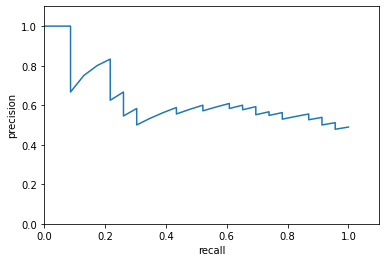

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_predd)

plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.xlim([0,1.1])
plt.ylim([0,1.1])

In [ ]:
img = X_train[0]
img2 = img.reshape(1,208,176,1)
op = model.layers[0](img2)
img4 = op.numpy()[0][:,:]

NameError: name 'X_train' is not defined

In [ ]:
img5 = np.concatenate([img4[:,:,i] for i in range(img4.shape[2])], axis=1)

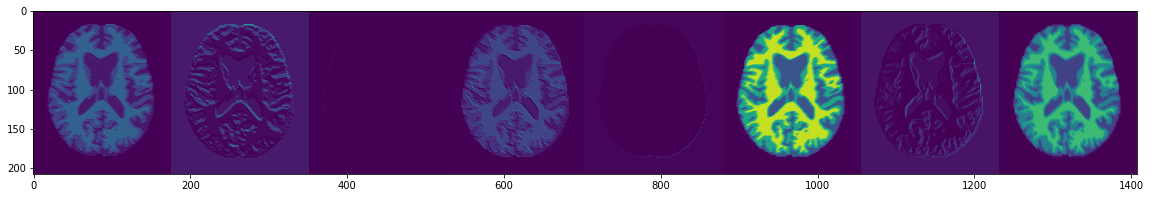

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)
plt.imshow(img5)


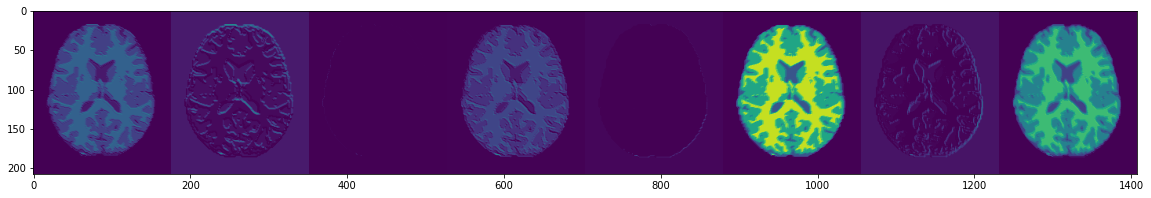

In [ ]:
plt.imshow(img5)

In [ ]:
weights = model.layers[0].get_weights()

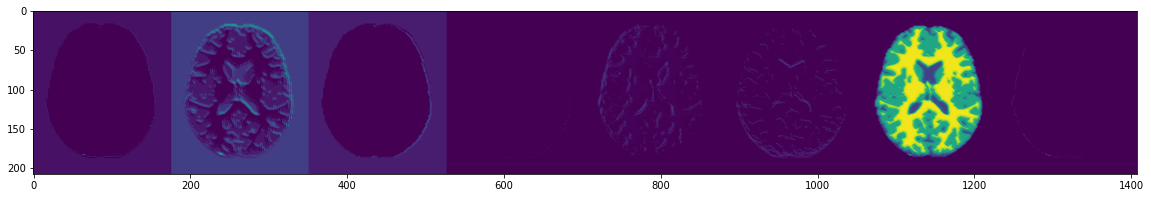

In [ ]:
op2 = model.layers[1](op)
img4 = op2.numpy()[0][:,:]
img5 = np.concatenate([img4[:,:,i] for i in range(img4.shape[2])], axis=1)
plt.imshow(img5)

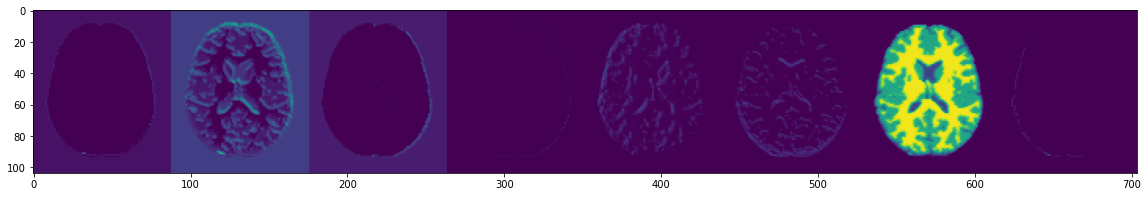

In [ ]:
op3 = model.layers[2](op2)
img4 = op3.numpy()[0][:,:]
img5 = np.concatenate([img4[:,:,i] for i in range(img4.shape[2])], axis=1)
plt.imshow(img5)

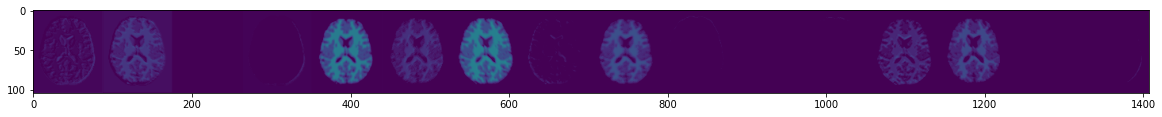

In [ ]:
op4 = model.layers[3](op3)
img4 = op4.numpy()[0][:,:]
img5 = np.concatenate([img4[:,:,i] for i in range(img4.shape[2])], axis=1)
plt.imshow(img5, vmax=1, vmin=0)